## Import libraries and data

In [2]:
%run load_data.py

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python3.6/site-packages/IPython/core/magics/execution.py:728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  exit_ignore=exit_ignore)
/anaconda/lib/python3.6/site-packages/IPython/core/magics/execution.py:728: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  exit_ignore=exit_ignore)
/anaconda/lib/python3.6/site-packages/IPython/core/magics/execution.py:728: DtypeWarning: Columns (0,112) have mixed types. Specify dtype option on import or set low_memory=False.
  exit_ignore=exit_ignore)
/anaconda/lib/python3.6/site-packages/IPython/core/magics/execution.py:728: DtypeWarning: Columns (0,123,124,125,128,129,1

## Plot loan grade distributions

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


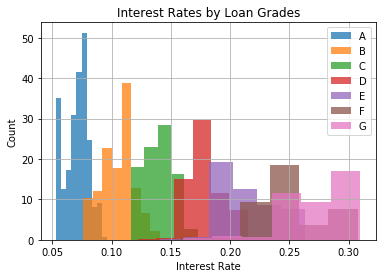

In [2]:
# Plot distribution of interest rates for each loan grade

for grade in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    subset = frame['grade'] == grade
    frame['int_rate_num'][subset].hist(label = grade, normed = True, alpha = 0.75)

plt.legend()
plt.title("Interest Rates by Loan Grades")
plt.ylabel("Count")
plt.xlabel("Interest Rate")
plt.savefig("interestratehistogram.png", dpi=200)
plt.show()

## Logistic Regression

In [3]:
# Logistic regression of probability of going bad on pre-application characteristics

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_features, train_labels["bad"])
test_features['pred_fail_rate'] = lr.predict_proba(test_features)[:, 1]

## Linear regression

In [4]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(train_features, train_labels["bad"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
import statsmodels.api as sm
linregCO = sm.OLS(train_labels["bad"], sm.add_constant(train_features)).fit()
linregCO.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1042: RuntimeWarning: invalid value encountered in absolute
  return stats.t.sf(np.abs(self.tvalues), df_resid)*2
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bad   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     452.8
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        18:06:53   Log-Likelihood:            -2.1720e+05
No. Observations:              479066   AIC:                         4.346e+05
Df Residuals:                  478964   BIC:                         4.357e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                  4.979e-07   8.11e-08      6.138      0.000    3.39e-07    6.57e-07
annual_inc                                -1.325e-07   9.64e-09    -13.741      0.000   -1.51e-07   -1.14e-07
dti                                           0.0026   6.61e-05     39.558      0.000       0.002       0.003
delinq_2yrs                                   0.0062      0.001      9.502      0.000       0.005       0.007
inq_last_6mths                                0.0102      0.001     17.346      0.000       0.009       0.011
open_acc                                      0.0029      0.000     19.399      0.000       0.003       0.003
pub_rec                                       0.0040      0.001      3.028      0.002       0.001       0.007
revol_bal                                 -2.519e-07   2.75e-08     -9.159      0.000   -3.06e-07   -1.98e-07
total_acc                                    -0.0014   6.71e-05    -20.841      0.000      -0.002      -0.001
collections_12_mths_ex_med                    0.0244      0.004      6.070      0.000       0.017       0.032
policy_code                                  -0.0673      0.007     -9.643      0.000      -0.081      -0.054
acc_now_delinq                                0.0012      0.007      0.174      0.862      -0.013       0.015
chargeoff_within_12_mths                     -0.0024      0.005     -0.464      0.643      -0.013       0.008
delinq_amnt                                1.324e-06   7.23e-07      1.831      0.067    -9.3e-08    2.74e-06
tax_liens                                    -0.0002      0.002     -0.113      0.910      -0.004       0.004
int_rate_num                                  1.4890      0.015    101.129      0.000       1.460       1.518
emp_length_num                               -0.0006      0.000     -2.845      0.004      -0.001      -0.000
term_years                                    0.0396      0.001     51.044      0.000       0.038       0.041
home_ownership_ANY                           -0.0257      0.040     -0.639      0.523      -0.105       0.053
home_ownership_MORTGAGE                      -0.0544      0.016     -3.429      0.001      -0.086      -0.023
home_ownership_NONE                           0.0425      0.069      0.615      0.539      -0.093       0.178
home_ownership_OTHER                          0.0051      0.037      0.137      0.891      -0.067       0.078
home_ownership_OWN                           -0.0300      0.016     -1.887      0.059      -0.061       0.001
home_ownership_RENT                          -0.0047      0.016     -0.299      0.765      -0.036       0.026
verification_status_Not Verified             -0.0351      0.002    -14.299      0.000      -0.040      -0.030
ver

## Explore returns

In [6]:
linreg_ret = sm.OLS(train_labels["return"], sm.add_constant(train_features)).fit()
linreg_ret.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1042: RuntimeWarning: invalid value encountered in absolute
  return stats.t.sf(np.abs(self.tvalues), df_resid)*2
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 return   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        18:07:03   Log-Likelihood:             5.0720e+05
No. Observations:              479066   AIC:                        -1.014e+06
Df Residuals:                  478964   BIC:                        -1.013e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                 -1.921e-07   1.79e-08    -10.743      0.000   -2.27e-07   -1.57e-07
annual_inc                                 2.638e-08   2.12e-09     12.415      0.000    2.22e-08    3.05e-08
dti                                          -0.0005   1.46e-05    -31.565      0.000      -0.000      -0.000
delinq_2yrs                                  -0.0011      0.000     -7.410      0.000      -0.001      -0.001
inq_last_6mths                               -0.0028      0.000    -21.797      0.000      -0.003      -0.003
open_acc                                     -0.0004   3.24e-05    -12.307      0.000      -0.000      -0.000
pub_rec                                       0.0004      0.000      1.228      0.219      -0.000       0.001
revol_bal                                  5.007e-08   6.06e-09      8.260      0.000    3.82e-08     6.2e-08
total_acc                                     0.0002   1.48e-05     14.571      0.000       0.000       0.000
collections_12_mths_ex_med                   -0.0041      0.001     -4.614      0.000      -0.006      -0.002
policy_code                                   0.3776      0.002    245.386      0.000       0.375       0.381
acc_now_delinq                                0.0003      0.002      0.211      0.833      -0.003       0.003
chargeoff_within_12_mths                     -0.0002      0.001     -0.195      0.845      -0.002       0.002
delinq_amnt                               -5.304e-07   1.59e-07     -3.327      0.001   -8.43e-07   -2.18e-07
tax_liens                                    -0.0007      0.000     -1.656      0.098      -0.002       0.000
int_rate_num                                 -0.0901      0.003    -27.760      0.000      -0.096      -0.084
emp_length_num                             6.928e-05   4.35e-05      1.593      0.111   -1.59e-05       0.000
term_years                                   -0.0055      0.000    -32.261      0.000      -0.006      -0.005
home_ownership_ANY                            0.0776      0.009      8.749      0.000       0.060       0.095
home_ownership_MORTGAGE                       0.0635      0.003     18.144      0.000       0.057       0.070
home_ownership_NONE                           0.0664      0.015      4.354      0.000       0.036       0.096
home_ownership_OTHER                          0.0592      0.008      7.257      0.000       0.043       0.075
home_ownership_OWN                            0.0580      0.004     16.530      0.000       0.051       0.065
home_ownership_RENT                           0.0529      0.003     15.130      0.000       0.046       0.060
verification_status_Not Verified              0.1286      0.001    237.881      0.000       0.128       0.130
ver

In [7]:
linreg_rec = sm.OLS(train_labels[train_labels.bad == 0]["return"], 
                    sm.add_constant(train_features[train_labels.bad == 0])).fit()
linreg_rec.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1042: RuntimeWarning: invalid value encountered in absolute
  return stats.t.sf(np.abs(self.tvalues), df_resid)*2
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 return   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1698.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        18:07:12   Log-Likelihood:             6.8131e+05
No. Observations:              384185   AIC:                        -1.362e+06
Df Residuals:                  384083   BIC:                        -1.361e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                 -9.399e-08   9.78e-09     -9.610      0.000   -1.13e-07   -7.48e-08
annual_inc                                 2.084e-09   1.15e-09      1.811      0.070   -1.71e-10    4.34e-09
dti                                        3.906e-05   8.02e-06      4.870      0.000    2.33e-05    5.48e-05
delinq_2yrs                                  -0.0003   8.01e-05     -3.648      0.000      -0.000      -0.000
inq_last_6mths                               -0.0005   7.23e-05     -6.533      0.000      -0.001      -0.000
open_acc                                  -2.134e-05   1.79e-05     -1.195      0.232   -5.64e-05    1.37e-05
pub_rec                                       0.0002      0.000      1.495      0.135   -7.54e-05       0.001
revol_bal                                  1.859e-08   3.19e-09      5.820      0.000    1.23e-08    2.49e-08
total_acc                                 -2.902e-05    8.1e-06     -3.584      0.000   -4.49e-05   -1.32e-05
collections_12_mths_ex_med                   -0.0001      0.001     -0.255      0.798      -0.001       0.001
policy_code                                   0.3734      0.001    425.607      0.000       0.372       0.375
acc_now_delinq                                0.0027      0.001      3.135      0.002       0.001       0.004
chargeoff_within_12_mths                      0.0007      0.001      1.028      0.304      -0.001       0.002
delinq_amnt                               -1.231e-07   9.37e-08     -1.315      0.189   -3.07e-07    6.04e-08
tax_liens                                    -0.0002      0.000     -0.987      0.324      -0.001       0.000
int_rate_num                                  0.2160      0.002    119.377      0.000       0.212       0.220
emp_length_num                            -7.906e-06   2.38e-05     -0.333      0.740   -5.45e-05    3.87e-05
term_years                                   -0.0066   9.71e-05    -67.763      0.000      -0.007      -0.006
home_ownership_ANY                            0.0785      0.005     16.631      0.000       0.069       0.088
home_ownership_MORTGAGE                       0.0565      0.002     28.800      0.000       0.053       0.060
home_ownership_NONE                           0.0708      0.009      8.100      0.000       0.054       0.088
home_ownership_OTHER                          0.0574      0.004     12.798      0.000       0.049       0.066
home_ownership_OWN                            0.0554      0.002     28.159      0.000       0.052       0.059
home_ownership_RENT                           0.0548      0.002     27.931      0.000       0.051       0.059
verification_status_Not Verified              0.1248      0.000    407.123      0.000       0.124       0.125
ver

In [8]:
linreg_rec_rate = sm.OLS(train_labels[train_labels.bad == 1]["return"], 
                         sm.add_constant(train_features[train_labels.bad == 1])).fit()
linreg_rec_rate.summary()
test_features["pred_rec_rate"] = linreg_rec_rate.predict(test_features.drop("pred_fail_rate", 1))

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1042: RuntimeWarning: invalid value encountered in absolute
  return stats.t.sf(np.abs(self.tvalues), df_resid)*2
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [29]:
np.corrcoef(test_features[["pred_fail_rate", "pred_rec_rate"]], rowvar=0)

array([[ 1.        , -0.17419685],
       [-0.17419685,  1.        ]])

In [30]:
# Compute expected gross return R

test_features["exp_R"] = ((1 + test_features["int_rate_num"]) * (1 - test_features["pred_fail_rate"]) +
                         test_features["pred_rec_rate"] * test_features["pred_fail_rate"])

## Are cross moments predictable?

In [31]:
features1 = train_features.iloc[:1000, :20].copy()
labels1 = train_labels.iloc[:1000, :20].copy()
features2 = train_features.iloc[1000:2000, :20].copy()
labels2 = train_labels.iloc[1000:2000, :20].copy()

## Predicting variances

In [ ]:
linreg_rec_rate2 = sm.OLS(train_labels[train_labels.bad == 1]["return"] ** 2, 
                         sm.add_constant(train_features[train_labels.bad == 1])).fit()
linreg_rec_rate2.summary()
test_features["pred_rec_rate2"] = linreg_rec_rate2.predict(sm.add_constant(test_features.iloc[:,:107]))

test_features["var_R"] = ((1 + test_features["int_rate_num"])**2 * (1 - test_features["pred_fail_rate"]) +
                         test_features["pred_rec_rate2"] * test_features["pred_fail_rate"] 
                         - test_features["exp_R"]**2)

## Skewness

In [ ]:
linreg_rec_rate3 = sm.OLS(train_labels[train_labels.bad == 1]["return"] ** 3, 
                         sm.add_constant(train_features[train_labels.bad == 1])).fit()
linreg_rec_rate3.summary()

test_features["pred_rec_rate3"] = linreg_rec_rate3.predict(test_features.iloc[:, :107])

test_features["exp_R3"] = ((1 + test_features["int_rate_num"])**3 * (1 - test_features["pred_fail_rate"]) +
                           test_features["pred_rec_rate3"] * test_features["pred_fail_rate"])

test_features.eval("skew_R = (exp_R3 - 3 * exp_R * var_R - exp_R ** 3)", inplace=True)

In [ ]:
sm.OLS(grades["grade_A"], sm.add_constant(test_features[["var_R", "skew_R"]])).fit(cov_type='HC0').summary()

In [ ]:
import statsmodels.stats.outliers_influence

statsmodels.stats.outliers_influence.variance_inflation_factor(test_features[["var_R", "skew_R"]].values, 1)

## Separate Regressions for Each Loan Grade

In [ ]:
# Regressions of rates on personal characteristics

from sklearn.linear_model import LogisticRegression

train_features_no_int = train_features.iloc[:, :107].drop("int_rate_num", 1)
test_features_no_int = test_features.iloc[:, :107].drop("int_rate_num", 1)

for grade in ["A", "B", "C", "D", "E", "F", "G"]: 
    
    lr_fail_rate = LogisticRegression()
    lr_fail_rate.fit(train_features_no_int[train_labels["grade_" + grade] == 1], 
                     train_labels[train_labels["grade_" + grade] == 1]["bad"])
    test_features["pred_fail_rate_" + grade] = lr_fail_rate.predict_proba(test_features_no_int)[:, 1]
    
#     lr_fail_rate = sm.OLS(train_labels[train_labels["grade_" + grade] == 1]["bad"],
#                     train_features_no_int[train_labels["grade_" + grade] == 1]).fit()
#     test_features["pred_fail_rate_" + grade] = lr_fail_rate.predict(test_features_no_int)
    
    mask = (train_labels["grade_" + grade] == 1) & (train_labels["bad"] == 1)
    lr_rec_rate = sm.OLS(train_labels[mask]["return"], sm.add_constant(train_features_no_int[mask])).fit()
    test_features["pred_rec_rate_" + grade] = lr_rec_rate.predict(test_features_no_int)
    
    lr_rec_rate2 = sm.OLS(train_labels[mask]["return"] ** 2, sm.add_constant(train_features_no_int[mask])).fit()
    test_features["pred_rec_rate2_" + grade] = lr_rec_rate2.predict(test_features_no_int)
    
    r = np.mean(train_features[train_labels["grade_" + grade] == 1]["int_rate_num"])
    
    test_features["exp_R_" + grade] = ((1 + r) * (1 - test_features["pred_fail_rate_" + grade]) +
                         test_features["pred_rec_rate_" + grade] * test_features["pred_fail_rate_" + grade])
    
    test_features["var_R_" + grade] = ((1 + r)**2 * (1 - test_features["pred_fail_rate_" + grade]) +
                         test_features["pred_rec_rate2_" + grade] * test_features["pred_fail_rate_" + grade] 
                         - test_features["exp_R_" + grade]**2)

In [ ]:
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    plt.plot(test_features[test_labels["grade_" + grade] == 1]["exp_R_" + grade], 
             test_features[test_labels["grade_" + grade] == 1]["var_R_" + grade], 
             marker='o', linestyle='', label=grade, alpha = 0.25)

plt.legend()
plt.title("Loans by Estimated Return and Variance")
plt.xlabel("Return")
plt.ylabel("Variance")
fig1 = plt.gcf()
fig1.savefig('returnvariance.png', dpi=200)
plt.show()

## ML Discrete Choice Model

In [ ]:
# Define negative log-likelihood function

def nllh(beta, features, labels):
    utilities = {}
    for grade in ["A", "B", "C", "D", "E", "F", "G"]:
        utilities[grade] = np.dot(features[["exp_R_" + grade, "var_R_" + grade]].values, beta)
    utilitiesArray = pd.DataFrame(utilities).values
    indicatorArray = labels[["grade_" + x for x in ["A", "B", "C", "D", "E", "F", "G"]]].values
    term1 = np.sum(utilitiesArray * indicatorArray, axis=1)
    term2 = np.log(np.sum(np.exp(utilitiesArray), axis=1))
    return -1 * np.sum(term1 - term2)

def grad(beta, features, labels):
    X1, X2 = {}, {}
    utilities = {}
    for grade in ["A", "B", "C", "D", "E", "F", "G"]:
        X1[grade] = features["exp_R_" + grade].values
        X2[grade] = features["var_R_" + grade].values
        utilities[grade] = np.dot(features[["exp_R_" + grade, "var_R_" + grade]].values, beta)
    X1Array = pd.DataFrame(X1).values
    X2Array = pd.DataFrame(X2).values
    utilitiesArray = pd.DataFrame(utilities).values
        
    indicatorArray = labels[["grade_" + x for x in ["A", "B", "C", "D", "E", "F", "G"]]].values
    
    d1 = (np.sum(X1Array * indicatorArray, axis=1) - 
     np.sum(np.exp(utilitiesArray) * X1Array, axis=1) / np.sum(np.exp(utilitiesArray), axis=1))
    d2 = (np.sum(X2Array * indicatorArray, axis=1) - 
     np.sum(np.exp(utilitiesArray) * X2Array, axis=1) / np.sum(np.exp(utilitiesArray), axis=1))
    
    return -1 * np.array([np.sum(d1), np.sum(d2)])

def nllh_restriction1(beta, features, labels):
    utilities = {}
    for grade in ["A", "B", "C", "D", "E", "F", "G"]:
        utilities[grade] = features["var_R_" + grade].values * beta
    utilitiesArray = pd.DataFrame(utilities).values
    indicatorArray = labels[["grade_" + x for x in ["A", "B", "C", "D", "E", "F", "G"]]].values
    term1 = np.sum(utilitiesArray * indicatorArray, axis=1)
    term2 = np.log(np.sum(np.exp(utilitiesArray), axis=1))
    return -1 * np.sum(term1 - term2)

def nllh_restriction2(beta, features, labels):
    utilities = {}
    for grade in ["A", "B", "C", "D", "E", "F", "G"]:
        utilities[grade] = features["exp_R_" + grade].values * beta
    utilitiesArray = pd.DataFrame(utilities).values
    indicatorArray = labels[["grade_" + x for x in ["A", "B", "C", "D", "E", "F", "G"]]].values
    term1 = np.sum(utilitiesArray * indicatorArray, axis=1)
    term2 = np.log(np.sum(np.exp(utilitiesArray), axis=1))
    return -1 * np.sum(term1 - term2)

In [ ]:
nllh([0,0], test_features, test_labels)

In [ ]:
# Run maximum likelihood estimation

import scipy.optimize

opt = scipy.optimize.minimize(nllh, [0,0], jac=grad, args=(test_features, test_labels), method='BFGS')

In [ ]:
opt

In [12]:
# Likelihood ratio tests

llh_r = scipy.optimize.minimize(nllh_restriction1, [0], args=(test_features, test_labels), method='BFGS').fun
-2 * (823726.5927953491 - llh_r)

4719.13144866447

In [13]:
llh_r = scipy.optimize.minimize(nllh_restriction2, [0], args=(test_features, test_labels), method='BFGS').fun
-2 * (823726.5927953491 - llh_r)

195624.18422374967

## Comparing estimated vs. actual loan assignments

In [87]:
beta = opt.x
utilities = {}
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    utilities[grade] = np.dot(test_features[["exp_R_" + grade, "var_R_" + grade]].values, beta)
utilitiesArray = pd.DataFrame(utilities).values
indicatorArray = test_labels[["grade_" + x for x in ["A", "B", "C", "D", "E", "F", "G"]]].values

In [88]:
np.mean(np.abs(utilitiesArray.argmax(axis=1) - indicatorArray.argmax(axis=1)) <= 1)

0.49887280666964468

## Polynomial regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

def predict_MLP(train_features, train_labels, test_features):
    train_features_no_int = train_features.iloc[:, :107].drop("int_rate_num", 1)
    test_features_no_int = test_features.iloc[:, :107].drop("int_rate_num", 1)

    for grade in ["A", "B", "C", "D", "E", "F", "G"]: 

        mlp_fail_rate = MLPRegressor()
        mlp_fail_rate.fit(train_features_no_int[train_labels["grade_" + grade] == 1], 
                          train_labels[train_labels["grade_" + grade] == 1]["bad"])
        test_features["MLP_pred_fail_rate_" + grade] = mlp_fail_rate.predict(test_features_no_int)

#         mask = (train_labels["grade_" + grade] == 1) & (train_labels["bad"] == 1)
#         lr_rec_rate = sm.OLS(train_labels[mask]["return"], sm.add_constant(train_features_no_int[mask])).fit()
#         test_features["pred_rec_rate_" + grade] = lr_rec_rate.predict(test_features_no_int)

#         lr_rec_rate2 = sm.OLS(train_labels[mask]["return"] ** 2, sm.add_constant(train_features_no_int[mask])).fit()
#         test_features["pred_rec_rate2_" + grade] = lr_rec_rate2.predict(test_features_no_int)

#         r = np.mean(train_features[train_labels["grade_" + grade] == 1]["int_rate_num"])

#         test_features["exp_R_" + grade] = ((1 + r) * (1 - test_features["pred_fail_rate_" + grade]) +
#                              test_features["pred_rec_rate_" + grade] * test_features["pred_fail_rate_" + grade])

#         test_features["var_R_" + grade] = ((1 + r)**2 * (1 - test_features["pred_fail_rate_" + grade]) +
#                              test_features["pred_rec_rate2_" + grade] * test_features["pred_fail_rate_" + grade] 
#                              - test_features["exp_R_" + grade]**2)
    return

PolynomialFeatures().fit_transform(train_features.head())

array([[  1.00000000e+00,   2.20000000e+04,   7.60000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.00000000e+03,   6.40000000e+04, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.05000000e+04,   3.10000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.50000000e+04,   1.46000000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   5.00000000e+03,   2.63900000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

## Bootstrap

In [ ]:
#Bootstrapping standard errors

from sklearn.utils import resample

iterations = 5
size = int(len())



for i in range(iterations):
    # sample data
    #boostrapping the training data
    
    bs_train_features = resample(train_features, n_samples = len(train_features))
    bs_train_labels = resample(train_labels, n_samples = len(train_labels))
    
    #bs_test_features = resample(test_features, n_samples = len(test_features))
    #bs_test_labels = resample(test_labels, n_samples = len(test_features))
    

    #creating predicted fail rate
    lr = LogisticRegression()
    lr.fit(bs_train_features, bs_train_labels["bad"])
    test_features['pred_fail_rate'] = lr.predict_proba(bs_test_features)[:, 1]
    
    
    #predicted recovery rate and expected return and variance
    linreg_rec_rate = sm.OLS(bs_train_labels[bs_train_labels.bad == 1]["return"], 
                         sm.add_constant(bs_train_features[bs_train_labels.bad == 1])).fit()
    linreg_rec_rate.summary()
    test_features["pred_rec_rate"] = linreg_rec_rate.predict(test_features.drop("pred_fail_rate", 1))
    
    test_features["exp_R"] = ((1 + test_features["int_rate_num"]) * (1 - test_features["pred_fail_rate"]) +
                         test_features["pred_rec_rate"] * test_features["pred_fail_rate"])
    
    linreg_rec_rate2 = sm.OLS(bs_train_labels[bs_train_labels.bad == 1]["return"] ** 2, 
                         sm.add_constant(bs_train_features[bs_train_labels.bad == 1])).fit()
    linreg_rec_rate2.summary()
    test_features["pred_rec_rate2"] = linreg_rec_rate2.predict(sm.add_constant(test_features.iloc[:,:107]))

    test_features["var_R"] = ((1 + test_features["int_rate_num"])**2 * (1 - test_features["pred_fail_rate"]) +
                         test_features["pred_rec_rate2"] * test_features["pred_fail_rate"] 
                         - test_features["exp_R"]**2)
    
    
    #expected return and variance by grade
    bs_train_features_no_int = bs_train_features.iloc[:, :107].drop("int_rate_num", 1)
    test_features_no_int = test_features.iloc[:, :107].drop("int_rate_num", 1)

    for grade in ["A", "B", "C", "D", "E", "F", "G"]: 
    
        lr_fail_rate = LogisticRegression()
        lr_fail_rate.fit(bs_train_features_no_int[bs_train_labels["grade_" + grade] == 1], 
                     bs_train_labels[bs_train_labels["grade_" + grade] == 1]["bad"])
        test_features["pred_fail_rate_" + grade] = lr_fail_rate.predict_proba(test_features_no_int)[:, 1]
    
        mask = (bs_train_labels["grade_" + grade] == 1) & (bs_train_labels["bad"] == 1)
        lr_rec_rate = sm.OLS(bs_train_labels[mask]["return"], sm.add_constant(bs_train_features_no_int[mask])).fit()
        test_features["pred_rec_rate_" + grade] = lr_rec_rate.predict(test_features_no_int)
    
        lr_rec_rate2 = sm.OLS(bs_train_labels[mask]["return"] ** 2, sm.add_constant(bs_train_features_no_int[mask])).fit()
        test_features["pred_rec_rate2_" + grade] = lr_rec_rate2.predict(test_features_no_int)
    
        r = np.mean(bs_train_features[bs_train_labels["grade_" + grade] == 1]["int_rate_num"])
    
        test_features["exp_R_" + grade] = ((1 + r) * (1 - test_features["pred_fail_rate_" + grade]) +
                         test_features["pred_rec_rate_" + grade] * test_features["pred_fail_rate_" + grade])
    
        test_features["var_R_" + grade] = ((1 + r)**2 * (1 - test_features["pred_fail_rate_" + grade]) +
                        test_features["pred_rec_rate2_" + grade] * test_features["pred_fail_rate_" + grade] 
                         - test_features["exp_R_" + grade]**2)
    
    #bootstrapping test_data
    bs_test_features = resample(test_features, n_samples = len(test_features))
    bs_test_labels = resample(test_labels, n_samples = len(test_labels))
    
    
    results = scipy.optimize.minimize(nllh, [0,0,0], args=(bs_test_features, bs_test_labels), method='Nelder-Mead')['x']
    # getting betas
    b1.append(results[0])
    b2.append(results[1])
    b3.append(results[2])

#standard errors
se_b1 = np.std(b1)
se_b2 = np.std(b2)
se_b3 = np.std(b3)

## Marginal Effects

In [38]:
#getting the MLE utility array \beta' x using the estimated betas from the estimation

est_betas = np.array([6.43002213, -53.826577])
utilities = {}
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
utilities[grade] = np.dot(features[["exp_R_" + grade, "var_R_" + grade]].values, est_betas)
est_utilitiesArray = pd.DataFrame(utilities).values


#defining the CDF of the logistic distribution

def lambda_(x):
    res = np.exp(x)/(1+exp(x))
    return(res)
    
#logistic density function (derivative of logistic CDF)

def gamma(x):
    res = lambda_(x)/(1-lambda_(x))
    return(res)

#marginal effect is the logistic density fucntion times the beta 
#should return an array of the marginal change in the expected probability given a feature ∂E(y|x)/∂x

def marginal_effect(x):
    res = np.dot(gamma(x), est_betas)
    return(res)

## How well does the mean variance paradigm perform out of sample?

In [ ]:
#predict utilities of assigning a given loan to a grade, run the matching algorithm then compare results

In [2]:
%run load_oos_data.py

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py:761: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  exit_ignore=exit_ignore)


In [3]:
# Regressions of rates on personal characteristics

from sklearn.linear_model import LogisticRegression

features_no_int = features.iloc[:, :107].drop("int_rate_num", 1)

In [4]:
for grade in ["A", "B", "C", "D", "E", "F", "G"]: 
    
    lr_fail_rate = LogisticRegression()
    lr_fail_rate.fit(features_no_int[labels["grade_" + grade] == 1], 
                     labels[labels["grade_" + grade] == 1]["bad"])
    features["pred_fail_rate_" + grade] = lr_fail_rate.predict_proba(features_no_int)[:, 1]
    
    mask = (labels["grade_" + grade] == 1) & (labels["bad"] == 1)
    
    lr_rec_rate = sm.OLS(labels[mask]["return"], sm.add_constant(features_no_int[mask])).fit()
    features["pred_rec_rate_" + grade] = lr_rec_rate.predict(features_no_int)
    
    lr_rec_rate2 = sm.OLS(labels[mask]["return"] ** 2, sm.add_constant(features_no_int[mask])).fit()
    features["pred_rec_rate2_" + grade] = lr_rec_rate2.predict(features_no_int)
    
    r = np.mean(features[labels["grade_" + grade] == 1]["int_rate_num"])
    
    features["exp_R_" + grade] = ((1 + r) * (1 - features["pred_fail_rate_" + grade]) +
                         features["pred_rec_rate_" + grade] * features["pred_fail_rate_" + grade])
    
    features["var_R_" + grade] = ((1 + r)**2 * (1 - features["pred_fail_rate_" + grade]) +
                         features["pred_rec_rate2_" + grade] * features["pred_fail_rate_" + grade] 
                         - features["exp_R_" + grade]**2)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


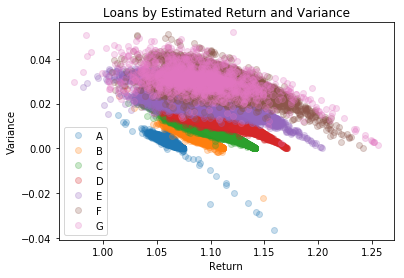

In [5]:
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    plt.plot(features[labels["grade_" + grade] == 1]["exp_R_" + grade], 
             features[labels["grade_" + grade] == 1]["var_R_" + grade], 
             marker='o', linestyle='', label=grade, alpha = 0.25)

plt.legend()
plt.title("Loans by Estimated Return and Variance")
plt.xlabel("Return")
plt.ylabel("Variance")
fig1 = plt.gcf()
fig1.savefig('returnvariance.png', dpi=200)
plt.show()

In [6]:
est_betas = np.array([6.43002213, -53.826577])
utilities = {}
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    utilities[grade] = np.dot(features[["exp_R_" + grade, "var_R_" + grade]].values, est_betas)
    est_utilitiesFrame = pd.DataFrame(utilities)

In [18]:
#final step I gotta run the matching algo
cap = pd.DataFrame([0])
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    cap[grade] = np.sum(labels['grade_' + grade])
    


In [50]:
#matching algo
def matching_algorithm(data, capacities):
    df = pd.DataFrame()
    data_length = len(data)
    for grade in ["A", "B", "C", "D", "E", "F", "G"]:
        data = data.sort_values(by = [grade], ascending = False)
        temp = data[:int(capacities[grade])].index.values.tolist()
        diff = data_length-len(temp)
        na = ['NaN']*diff
        df[grade] = temp + na
        data = data[int(capacities[grade]):]
    return(df)


final_matching = matching_algorithm(est_utilitiesFrame, cap)

In [123]:
#finding mathcing values between mathcing algo output and real matches
l = []
for grade in ["A", "B", "C", "D", "E", "F", "G"]:
    a = final_matching[grade].values.tolist()
    a = [x for x in a if str(x) != 'NaN']
    b = labels.loc[labels['grade_'+grade] == 1].index.tolist()
    res = (len(set(a).intersection(b)))/len(b)
    l.append('return and varance predict ' + str(res)[:4] + ' % of matches for grade ' + grade)

l